In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import MaxNLocator

from tqdm.notebook import tqdm

rcParams = {
    'xtick.labelsize': 12,
    'axes.titlesize': 22,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 12,
    'lines.linewidth': 2
}
sns.set_context("paper", font_scale=2, rc=rcParams)

In [2]:
variable_names = {
    **{f'X{i}': f'X_{i}' for i in range(9)},
    'Z00': 'Z_{syn}',
    'Z01': 'Z_{red}',
    'Z_syn': 'Z_{syn}',
    'Z_red': 'Z_{red}',
    'Zxor': 'Z_{xor}'
}

methods = ['THOI', 'JIDT']

method_colors = {
    m:c for m,c in zip(['THOI','JIDT'], sns.color_palette('muted', 2))
}

def format_nplet_name(nplet):
    variables = nplet.split('-')
    variables = [variable_names[v] for v in variables]
    return fr'$({",".join(variables)})$'

In [3]:
def read_csv(path):
    df1 = pd.read_csv(path + '.tsv', sep='\t')
    df1 = df1[df1.method == 'THOI']
    df2 = pd.read_csv(path + '_JDIT.tsv', sep='\t')

    return pd.concat([df1, df2])

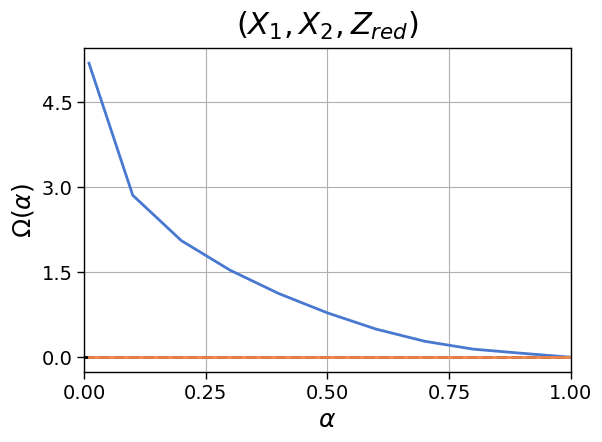

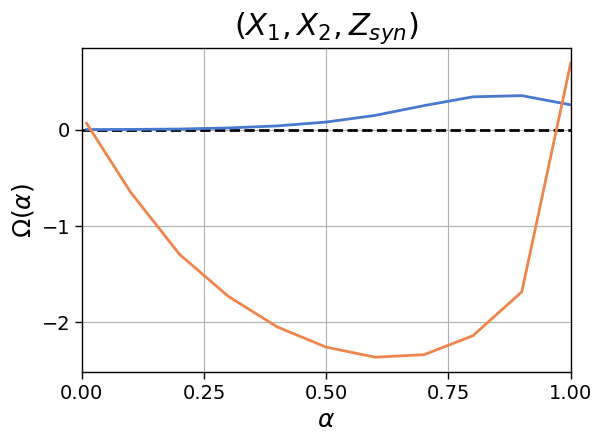

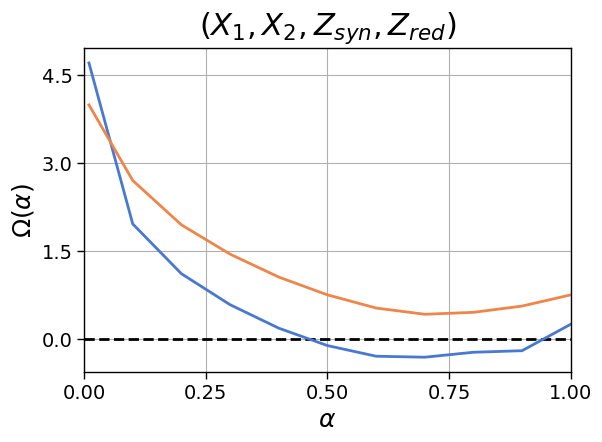

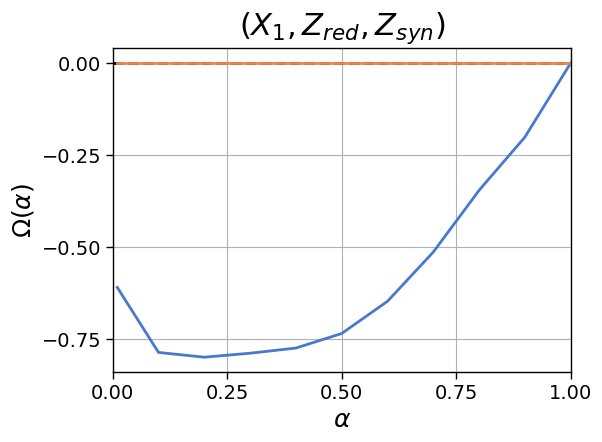

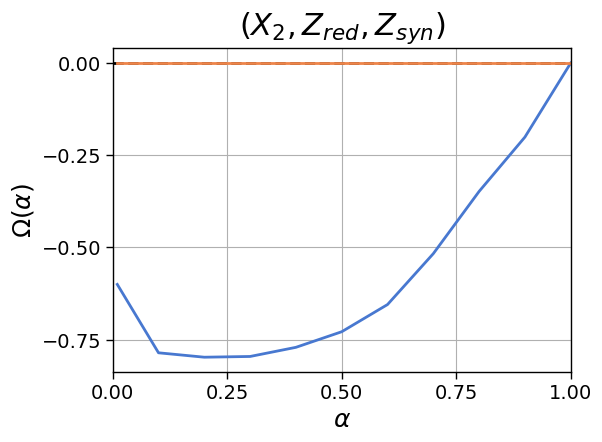

"\nlegend_elements_gaussian = [\n    Line2D([0], [0], color=method_colors['THOI'], lw=2, label='THOI'),\n    Line2D([0], [0], color=method_colors['JIDT'], lw=2, label='JIDT')\n]\n\n# Position the legends to avoid overlap    \naxes[-1,-1].legend(\n    handles=legend_elements_gaussian,\n    title='Library',\n    loc='upper right',\n    bbox_to_anchor=(1., -0.15),\n    ncol=2,\n    title_fontsize=16\n)\n"

In [4]:
df = read_csv('../benchmarking/results/o_info/system-relu_pow-0.5_repeat-20_t-10000')
df = df[abs((1 - df.alpha) - df.beta) < 0.001]

for nplet, df_nplet in df.groupby('n-plet'):
    ax = plt.gca()

    sns.lineplot(
        df_nplet, x='alpha', y='O-information', hue='method',
        hue_order=methods, palette=method_colors, ax=ax
    )

    ax.set_xlim(0, 1)
    ax.xaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
    ax.hlines(0, xmin=0.0, xmax=1.0, color='black', linestyles='--')
    
    ax.set_title(format_nplet_name(nplet), pad=10)
    ax.set_ylabel(r'$\Omega (\alpha)$')
    ax.set_xlabel(r'$\alpha$')
    ax.grid(True)
    ax.get_legend().remove()

    plt.tight_layout()  # Adjust the layout to make room for the legends
    plt.savefig(f'./figures/o_info/system-relu_pow-0.5_nplet-{nplet}_lineplot.pdf', format='pdf')
    plt.show()

'''
legend_elements_gaussian = [
    Line2D([0], [0], color=method_colors['THOI'], lw=2, label='THOI'),
    Line2D([0], [0], color=method_colors['JIDT'], lw=2, label='JIDT')
]

# Position the legends to avoid overlap    
axes[-1,-1].legend(
    handles=legend_elements_gaussian,
    title='Library',
    loc='upper right',
    bbox_to_anchor=(1., -0.15),
    ncol=2,
    title_fontsize=16
)
'''

  0%|          | 0/10 [00:00<?, ?it/s]

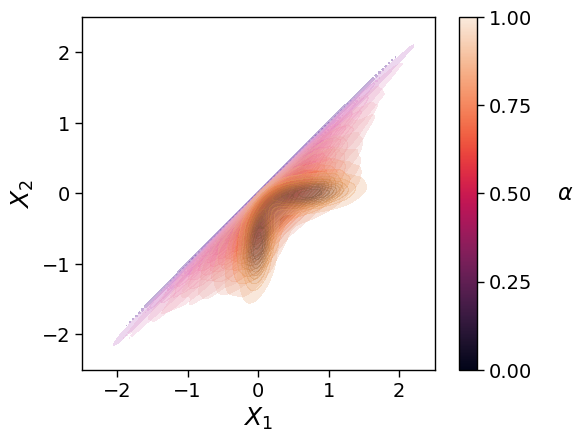

In [10]:
def ReLU(X, cutoff=0):
    return np.maximum(X,cutoff)


def generate_relu_sistem(alpha: float=1.0, beta: float=1.0, pow_factor: float=0.5, T: float=10000):

    assert 0 <= alpha <= 1.0, 'alpha must be in range [0,1]'
    assert 0 <= beta <= 1.0, 'beta must be in range [0,1]'

    Z_syn, Z_red = np.random.normal(0, 1, (2,T))

    X1 = alpha*np.power(ReLU(Z_syn), pow_factor)    + beta*Z_red
    X2 = -alpha*np.power(ReLU(-Z_syn), pow_factor)  + beta*Z_red

    return pd.DataFrame({'X1': X1, 'X2': X2, 'Z_syn': Z_syn, 'Z_red': Z_red})

# get color pallet for 10 items in a cmap
palette = sns.color_palette('rocket', 10) 
ax = plt.gca()
datas = []
for i, alpha in enumerate(tqdm(np.arange(0.01, 1.002, 0.1))):
    data = generate_relu_sistem(alpha=alpha, beta=(1-alpha), pow_factor=0.5)
    sns.kdeplot(data=data, x='X1', y='X2', fill=True, color=palette[i], alpha=max(0.3, 1/(i+1)), ax=ax)

# add a colorbar with the color palette range
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(0,1.1,0.25))
cbar.ax.set_ylabel(r'$\alpha$', rotation=0, va='center', labelpad=24, fontsize=16)

plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('./figures/systems/system-ReLU_power-0.5_X1_vs_X2.pdf', format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

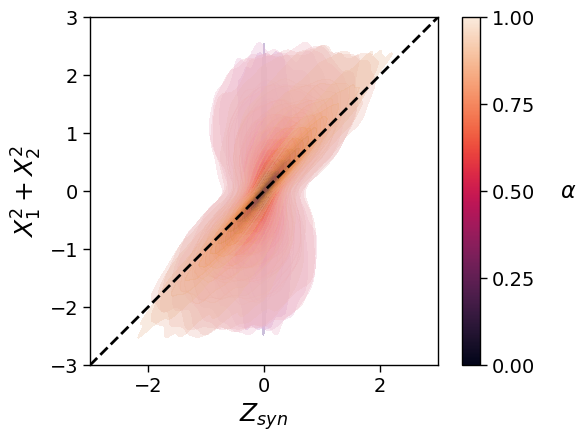

In [5]:
def ReLU(X, cutoff=0):
    return np.maximum(X,cutoff)


def generate_relu_sistem(alpha: float=1.0, beta: float=1.0, pow_factor: float=0.5, T: float=10000):

    assert 0 <= alpha <= 1.0, 'alpha must be in range [0,1]'
    assert 0 <= beta <= 1.0, 'beta must be in range [0,1]'

    Z_syn, Z_red = np.random.normal(0, 1, (2,T))

    X1 = alpha*np.power(ReLU(Z_syn), pow_factor)    + beta*Z_red
    X2 = -alpha*np.power(ReLU(-Z_syn), pow_factor)  + beta*Z_red

    return pd.DataFrame({'X1': X1, 'X2': X2, 'Z_syn': Z_syn, 'Z_red': Z_red})

# get color pallet for 10 items in a cmap
palette = sns.color_palette('rocket', 10) 
ax = plt.gca()


# plot 45 degree line
ax.plot([-3, 3], [-3, 3], color='black', linestyle='--')

datas = []
for i, alpha in enumerate(tqdm(np.arange(0.01, 1.002, 0.1))):
    data = generate_relu_sistem(alpha=alpha, beta=(1-alpha), pow_factor=0.5)
    data['X1^2+X2^2'] = data['X1']**2 - data['X2']**2
    sns.kdeplot(data=data, x='X1^2+X2^2', y='Z_syn', fill=True, color=palette[i], alpha=max(0.3, 1/(i+1)), ax=ax)

# add a colorbar with the color palette range
sm = plt.cm.ScalarMappable(cmap='rocket', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(0,1.1,0.25))
cbar.ax.set_ylabel(r'$\alpha$', rotation=0, va='center', labelpad=24, fontsize=16)

plt.xlabel(r'$Z_{syn}$')
plt.ylabel(r'$X_1^2 + X_2^2$')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('./figures/systems/system-ReLU_power-0.5_x1+x2_vs_Zsyn.pdf', format='pdf', bbox_inches='tight', pad_inches=0)
plt.show()